=== Data Partition Validation ===
Training period: 2019-01-08 to 2021-12-31
Testing period:  2022-01-01 to 2022-12-31
Training samples: 1,089
Testing samples:  365

Class distribution (Training):
PRECTOTCORR_binary
1    0.582185
0    0.417815
Name: proportion, dtype: float64

Training shapes - X: (1253, 15, 14), y: (1253,)
Test shapes - X: (350, 15, 14), y: (350,)


c:\Users\priya\main_rainfall_prediction\Rainfall_prediction\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 15, 64)         │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 15, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 7, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 3, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,441 (833.75 KB)

 Trainable params: 213,057 (832.25 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7804 - auc: 0.8383 - loss: 3.6698 - precision: 0.7873 - recall: 0.8753 - val_accuracy: 0.7610 - val_auc: 0.7280 - val_loss: 2.2537 - val_precision: 0.1556 - val_recall: 0.2414 - learning_rate: 0.0010
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8017 - auc: 0.8711 - loss: 1.7547 - precision: 0.8178 - recall: 0.8578 - val_accuracy: 0.8606 - val_auc: 0.8471 - val_loss: 1.2164 - val_precision: 0.3846 - val_recall: 0.3448 - learning_rate: 0.0010
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8382 - auc: 0.9037 - loss: 0.9223 - precision: 0.8647 - recall: 0.8642 - val_accuracy: 0.7729 - val_auc: 0.8389 - val_loss: 0.9112 - val_precision: 0.3293 - val_recall: 0.9310 - learning_rate: 0.0010
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8252 - auc: 0.8973 - loss: 0.6270 - precision: 0.8332 - recall: 0.8801 - val_accuracy: 0.8048 - val_auc: 0.8061 - val_loss: 0.7378 - val_pr

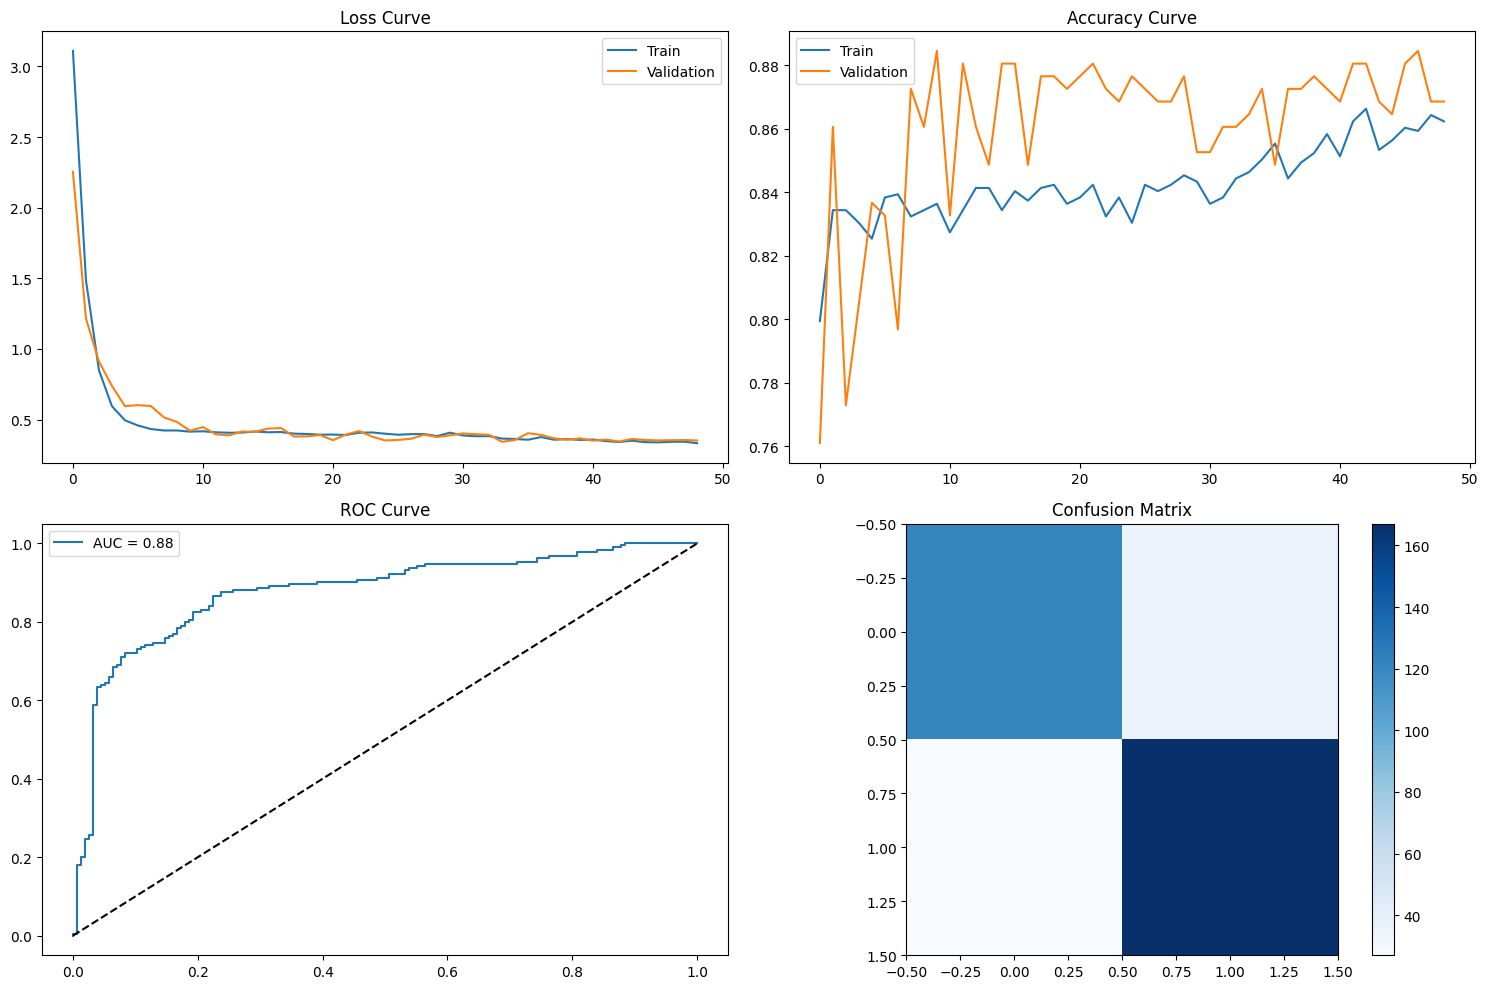

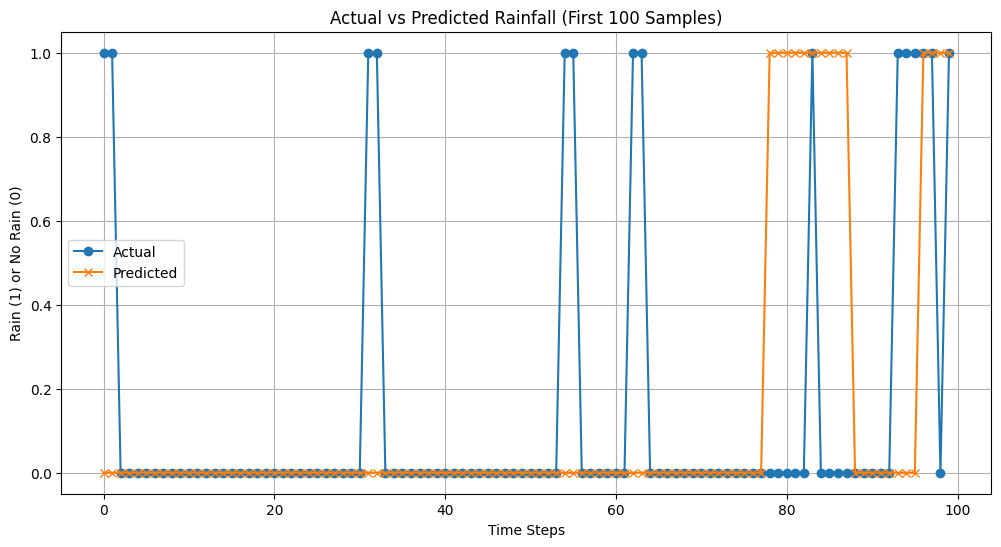


Next 7 Day Predictions:
Day 1: No Rain
Day 2: No Rain
Day 3: No Rain
Day 4: No Rain
Day 5: No Rain
Day 6: No Rain
Day 7: No Rain


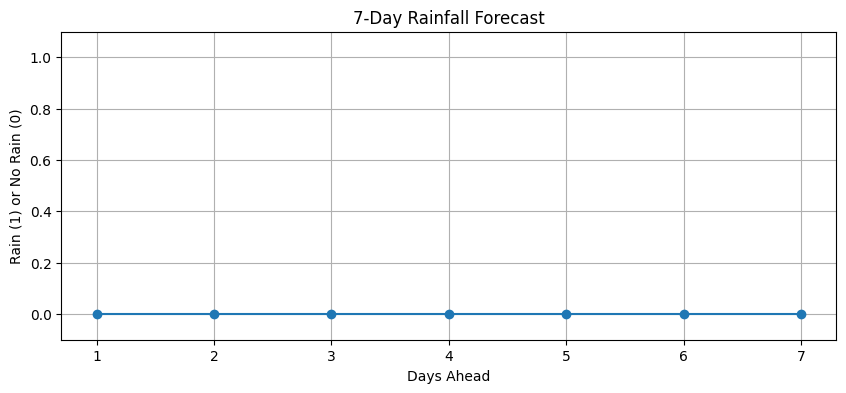

In [1]:
# code for rainfall prediction in hyderabad using cnn+lstm
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                           accuracy_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve, auc)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv1D, MaxPooling1D, LSTM, 
                                   Dense, Dropout, Flatten, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 1: Load and Prepare Data
def load_and_prepare_data():
    try:
        df_2019 = pd.read_csv('C:\\Users\\priya\\main_rainfall_prediction\\Rainfall_prediction\\datatsets\\hyderabad_2019.csv').assign(YEAR=2019)
        df_2020 = pd.read_csv('C:\\Users\\priya\\main_rainfall_prediction\\Rainfall_prediction\\datatsets\\hyderabad_2020.csv').assign(YEAR=2020)
        df_2021 = pd.read_csv('C:\\Users\\priya\\main_rainfall_prediction\\Rainfall_prediction\\datatsets\\hyderabad_2021.csv').assign(YEAR=2021)
        df_2022 = pd.read_csv('C:\\Users\\priya\\main_rainfall_prediction\\Rainfall_prediction\\datatsets\\hyderabad_2022.csv').assign(YEAR=2022)
    except FileNotFoundError as e:
        raise FileNotFoundError(f"Error loading CSV files: {e}")

    # Concatenate data
    full_df = pd.concat([df_2019, df_2020, df_2021, df_2022], ignore_index=True)
    
    # Data preprocessing
    required_cols = ['YEAR', 'MO', 'DY', 'PRECTOTCORR']  # Include PRECTOTCORR for clarity
    for col in required_cols:
        full_df[col] = pd.to_numeric(full_df[col], errors='coerce')
    full_df.dropna(subset=required_cols, inplace=True)

    full_df['datetime'] = pd.to_datetime(dict(year=full_df['YEAR'], month=full_df['MO'], day=full_df['DY']))
    full_df['DOY'] = full_df['datetime'].dt.dayofyear
    full_df['sin_DOY'] = np.sin(2 * np.pi * full_df['DOY'] / 365.25)
    full_df['cos_DOY'] = np.cos(2 * np.pi * full_df['DOY'] / 365.25)

    # Add lagged features
    full_df['PRECTOTCORR_lag1'] = full_df['PRECTOTCORR'].shift(1)
    full_df['PRECTOTCORR_lag3'] = full_df['PRECTOTCORR'].shift(3)
    full_df['PRECTOTCORR_lag7'] = full_df['PRECTOTCORR'].shift(7)

    # Calculate Sea Level Temperature
    elevation = 505.5  # Adilabad elevation in meters
    lapse_rate = 0.0065  # °C per meter
    full_df['SLT'] = full_df['TS'] + (lapse_rate * elevation)
    full_df.dropna(inplace=True)

    # Define features and target
    features = ['SLT', 'SLP', 'T2M', 'TS', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'WS10M_MAX', 'WS10M_MIN',
                'sin_DOY', 'cos_DOY', 'PRECTOTCORR_lag1', 'PRECTOTCORR_lag3', 'PRECTOTCORR_lag7']
    full_df['PRECTOTCORR_binary'] = (full_df['PRECTOTCORR'] > 0).astype(int)
    target = 'PRECTOTCORR_binary'

    # Strict year-based split
    train_df = full_df[full_df['YEAR'].isin([2019, 2020, 2021])].copy()
    test_df = full_df[full_df['YEAR'] == 2022].copy()
    
    # Validate the split
    print("=== Data Partition Validation ===")
    print(f"Training period: {train_df['datetime'].min().date()} to {train_df['datetime'].max().date()}")
    print(f"Testing period:  {test_df['datetime'].min().date()} to {test_df['datetime'].max().date()}")
    print(f"Training samples: {len(train_df):,}")
    print(f"Testing samples:  {len(test_df):,}")
    print("\nClass distribution (Training):")
    print(train_df['PRECTOTCORR_binary'].value_counts(normalize=True))
    
    return train_df, test_df, features, target

# Step 2: Balance and Preprocess Data
def preprocess_and_balance_data(train_df, test_df, features, target):
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_df[features])
    test_scaled = scaler.transform(test_df[features])

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    train_balanced, train_target = smote.fit_resample(train_scaled, train_df[target])
    
    # Create DataFrames
    train_balanced_df = pd.DataFrame(train_balanced, columns=features)
    train_balanced_df[target] = train_target
    
    test_scaled_df = pd.DataFrame(test_scaled, columns=features, index=test_df.index)
    test_scaled_df[target] = test_df[target]
    test_scaled_df['DOY'] = test_df['DOY']
    
    return train_balanced_df, test_scaled_df, scaler

# Step 3: Create Sequences
def create_sequences(data, features, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq_features = data[features].iloc[i:i+seq_length].values
        X.append(seq_features)
        y.append(data[target].iloc[i+seq_length])
    return np.array(X), np.array(y)

# Step 4: Build CNN-LSTM Model
def build_cnn_lstm_model(seq_length, n_features):
    model = Sequential([
        # CNN Part
        Conv1D(filters=64, kernel_size=3, activation='relu', 
               input_shape=(seq_length, n_features), padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        
        Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        
        # LSTM Part
        LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        LSTM(64, kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        
        # Output
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 
                          tf.keras.metrics.Precision(name='precision'),
                          tf.keras.metrics.Recall(name='recall'),
                          tf.keras.metrics.AUC(name='auc')])
    model.summary()
    return model

# Step 5: Train and Evaluate
def train_and_evaluate(seq_length=15):
    # Load and prepare data
    train_df, test_df, features, target = load_and_prepare_data()
    
    # Balance and preprocess
    train_balanced, test_scaled, scaler = preprocess_and_balance_data(train_df, test_df, features, target)
    
    # Create sequences
    X_train, y_train = create_sequences(train_balanced, features, target, seq_length)
    X_test, y_test = create_sequences(test_scaled, features, target, seq_length)
    
    print(f"\nTraining shapes - X: {X_train.shape}, y: {y_train.shape}")
    print(f"Test shapes - X: {X_test.shape}, y: {y_test.shape}")

    # Build and train model
    model = build_cnn_lstm_model(seq_length, len(features))
    
    callbacks = [
        EarlyStopping(patience=15, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=5)
    ]
    
    history = model.fit(X_train, y_train,
                        epochs=100,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=callbacks,
                        verbose=1)

    # Evaluate
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Metrics
    print("\nEvaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot results
    plot_results(history, y_test, y_pred_prob, y_pred)
    
    return model, scaler, test_scaled, features, target

def plot_results(history, y_test, y_pred_prob, y_pred):
    plt.figure(figsize=(15, 10))
    
    # Loss
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss Curve')
    plt.legend()
    
    # Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Accuracy Curve')
    plt.legend()
    
    # ROC Curve
    plt.subplot(2, 2, 3)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.legend()
    
    # Confusion Matrix
    plt.subplot(2, 2, 4)
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()

    # Actual vs Predicted plot
    plt.figure(figsize=(12, 6))
    plt.plot(y_test[:100], label='Actual', marker='o')
    plt.plot(y_pred[:100], label='Predicted', marker='x')
    plt.title('Actual vs Predicted Rainfall (First 100 Samples)')
    plt.xlabel('Time Steps')
    plt.ylabel('Rain (1) or No Rain (0)')
    plt.legend()
    plt.grid()
    plt.show()

# Step 6: Make Predictions
def make_predictions(model, scaler, test_scaled, features, seq_length, days=7):
    last_sequence = test_scaled[features].iloc[-seq_length:].values
    predictions = []
    
    for _ in range(days):
        # Reshape for model input
        x = last_sequence.reshape(1, seq_length, len(features))
        # Predict
        pred = model.predict(x, verbose=0)[0][0]
        predictions.append(1 if pred > 0.5 else 0)
        # Update sequence
        new_row = last_sequence[-1].copy()
        new_row[-3] = pred  # Update lag1 feature
        last_sequence = np.vstack([last_sequence[1:], new_row])
    
    return predictions

# Main execution
if __name__ == "__main__":
    seq_length = 15
    model, scaler, test_scaled, features, target = train_and_evaluate(seq_length)
    
    # Make future predictions
    future_preds = make_predictions(model, scaler, test_scaled, features, seq_length)
    print("\nNext 7 Day Predictions:")
    for i, pred in enumerate(future_preds, 1):
        print(f"Day {i}: {'Rain' if pred == 1 else 'No Rain'}")
    
    # Plot predictions
    plt.figure(figsize=(10, 4))
    plt.plot(range(1, 8), future_preds, 'o-')
    plt.title('7-Day Rainfall Forecast')
    plt.xlabel('Days Ahead')
    plt.ylabel('Rain (1) or No Rain (0)')
    plt.ylim(-0.1, 1.1)
    plt.grid()
    plt.show()
